In [2]:
#import packages
import pandas as pd
import numpy as np

In [3]:
#%% set graphs style
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')

In [4]:
#%% Import data
df = pd.read_csv('mathtest.csv')
schools = df.groupby('school')

C:\Users\BeatriceCantoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


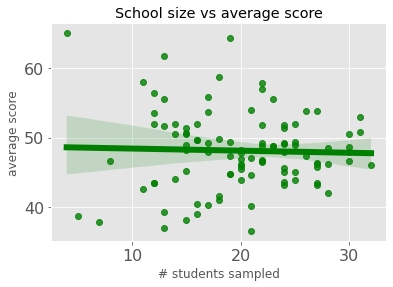

In [5]:
#%%EX B)
means = schools.mean().to_numpy()
sizes = schools.size().to_numpy()
ax = sns.regplot(sizes, means, color="g")
plt.title("School size vs average score")
plt.xlabel("# students sampled")
plt.ylabel("average score")
plt.show()

In [6]:
#%%EX C)
from hierarchical_main import Hierarchical
model = Hierarchical(df)
model.fit_GibbsSampler(n_iter=5000, burn=1000)

100%|██████████| 5000/5000 [00:10<00:00, 468.47it/s]


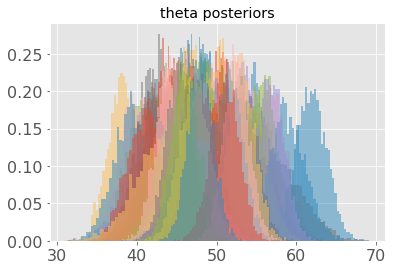

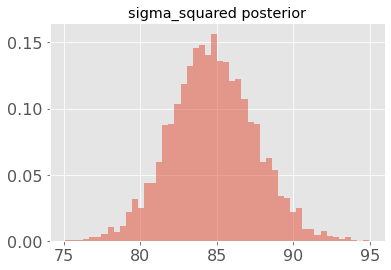

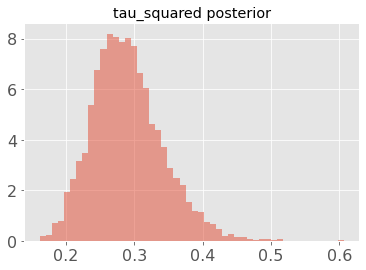

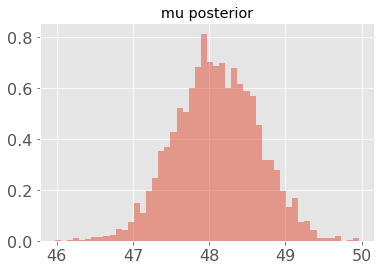

<Figure size 432x288 with 0 Axes>

In [7]:
model.plot_all_posteriors()

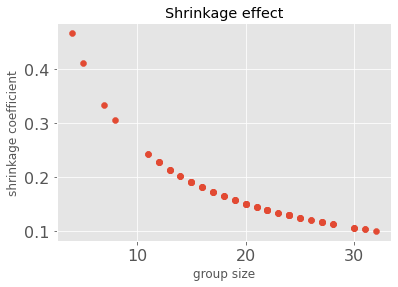

In [8]:
#%%EX D)
model.shrinkage()

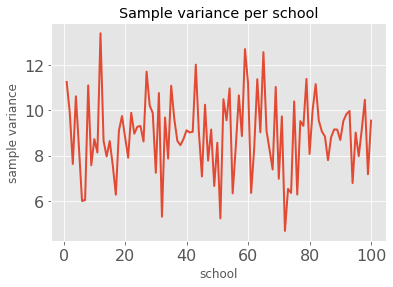

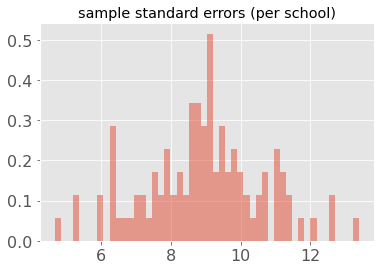

In [9]:
#%%EX F)
variances = schools.var().to_numpy()
plt.plot([i+1 for i in range(len(variances))], 
         np.sqrt(variances), linewidth =2.0)
plt.title("Sample variance per school")
plt.xlabel("school")
plt.ylabel("sample variance")
plt.show()

#%%
plt.hist(np.sqrt(variances), density=True, alpha=.5, bins=50)
plt.title("sample standard errors (per school)")
plt.show()

In [11]:
model.get_estimate()

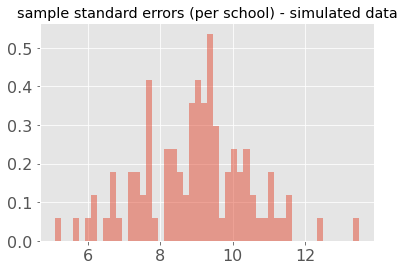

In [14]:
sizes = model.n_i
thetas = model.theta_post
mu = model.mu_post
sigma = np.sqrt(model.sigma_squared_post)
tau_squared = model.tau_squared_post
sample = []
sample_variances = []
for s in range(0, len(sizes)):
    obs = np.random.normal(loc= thetas[s],
                           scale= sigma,
                           size = sizes[s])
    sample.append(obs)
    sample_variances.append(np.var(obs))

plt.hist(np.sqrt(sample_variances), density=True, alpha=.5, bins=50)
plt.title("sample standard errors (per school) - simulated data")
plt.show()

In [16]:
#%%seems to be normal so I can do an F test to check for the standard deviations
from scipy.stats import f
data_sd = np.sqrt(variances)
simulated_sd = np.sqrt(sample_variances)
F = np.var(data_sd) / np.var(simulated_sd)
df1 = len(data_sd) - 1
df2 = len(simulated_sd) - 1
p_value = f.cdf(F, df1, df2)
p_value

0.9053384151943615